# Image preprocessing

In [1]:
import data_reader
import dataset

import matplotlib.pyplot as plt
import numpy as np
import pickle


In [2]:
data_path = r"C:\Users\Alejandro\Desktop\heterogeneous-data\data\gdc_download_20220427_144600.480657"

case_id = os.listdir(data_path)[15:30]

paths = [data_path + "\\" + case for case in case_id] # All case folders paths

In [3]:
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

data_r = data_reader.Data_reader(
    folder_name="gdc_download_20220427_144600.480657",
    formats=[".svs"])

data_r.read_data(
    paths,
    patch_size=300,
    dataset='train')

100%|██████████| 15/15 [16:55<00:00, 67.70s/it] 


In [4]:
data_set = data_r.data_reader_to_dataset(case_id)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Number of samples:  7601


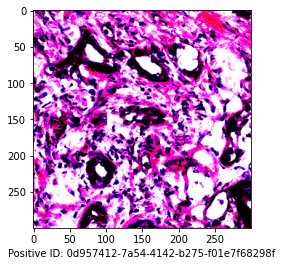

In [5]:
data_set.show_patch(patch_num=100)

Number of patches:  7601
Percentage of positive patches:  0.9119852650966978


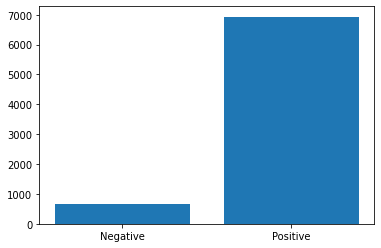

In [6]:
positive = [(y[0]==1) for y in data_set.labels].count(True)
plt.bar(["Negative", "Positive"], [data_set.__len__()-positive ,positive])

print("Number of patches: ", data_set.__len__())
print("Percentage of positive patches: ", positive/data_set.__len__())

In [7]:
name = "test_set"

with open(f"C:/Users/Alejandro/Desktop/heterogeneous-data/data/datasets/{name}.obj", 'wb') as f:
    object_pi2 = pickle.dump(data_set, f)